In [12]:
#import dependencies
import calendar
import pandas as pd
import numpy as np
import csv
import numpy as np
from scipy.stats import linregress
from matplotlib import pyplot as plt
import hvplot.pandas

#read csv and delete unnecessary columns
wildfires_df = pd.read_csv("US_Lightning_Forest_Fires.csv")
del wildfires_df["STAT_CAUSE_DESCR"]
del wildfires_df["Unnamed: 0"]
wildfires_df.head(10)

,index,FIRE_YEAR,Fire_Date,DISCOVERY_TIME,Days_to_extinguish_fire,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIPS_CODE,FIPS_NAME
0,1,2004,05-12-2004,845.0,0.0,1530.0,0.25,A,38.933056,-120.404444,CA,61.0,Placer
1,3,2004,06-28-2004,1600.0,5.0,1400.0,0.10,A,38.559167,-119.913333,CA,3.0,Alpine
2,4,2004,06-28-2004,1600.0,5.0,1200.0,0.10,A,38.559167,-119.933056,CA,3.0,Alpine
3,5,2004,06-30-2004,1800.0,1.0,1600.0,0.10,A,38.635278,-120.103611,CA,5.0,Amador
4,6,2004,07-01-2004,1800.0,1.0,1400.0,0.10,A,38.688333,-120.153333,CA,17.0,El Dorado
5,9,2004,07-01-2004,1800.0,1.0,1800.0,0.10,A,38.548333,-120.149167,CA,5.0,Amador
6,10,2004,07-02-2004,1830.0,1.0,1900.0,0.10,A,38.691667,-120.159722,CA,17.0,El Dorado
7,11,2004,07-02-2004,1730.0,1.0,2000.0,0.10,A,38.527500,-120.106111,CA,5.0,Amador
8,14,2004,10-03-2004,630.0,0.0,1500.0,0.20,A,38.675833,-120.279722,CA,17.0,El Dorado
9,15,2004,10-03-2004,930.0,0.0,1400.0,0.10,A,38.564167,-120.542222,CA,17.0,El Dorado


In [13]:
#set dataframe to Florida
Alaska_df = wildfires_df.loc[wildfires_df["STATE"] == "AK"]

#display the data
Alaska_df.head()

,index,FIRE_YEAR,Fire_Date,DISCOVERY_TIME,Days_to_extinguish_fire,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIPS_CODE,FIPS_NAME
14317,26386,2007,08-10-2007,2200.0,2.0,1700.0,0.1,A,56.777778,-132.935833,AK,280.0,Wrangell-Petersburg
20403,38641,2009,07-07-2009,900.0,0.0,1030.0,0.1,A,56.243333,-132.299167,AK,280.0,Wrangell-Petersburg
21736,41201,2009,09-19-2009,1300.0,65.0,1200.0,10.0,C,60.873889,-149.120556,AK,122.0,Kenai Peninsula
41106,75390,1993,06-16-1993,600.0,0.0,1600.0,0.1,A,56.166667,-132.333333,AK,NaN,NaN
41107,75391,1993,07-12-1993,2001.0,1.0,701.0,0.1,A,56.333333,-132.166667,AK,NaN,NaN


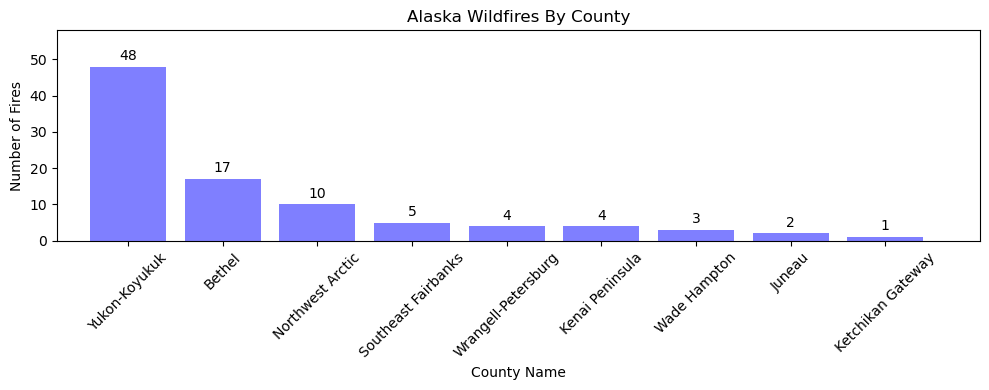

In [14]:
#determine the number of counties that reported wildfires in Florida
county_count = Alaska_df["FIPS_NAME"].value_counts()
county_count

#set up a list for the county names, and append the data to the list
AK_county_name= county_count.index
AK_occurences = county_count.values

#set up visualization of number of fires per county
x_axis = np.arange(len(AK_county_name.unique()))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(10,4))
plt.bar(x_axis, AK_occurences, color='b', alpha=0.5, align='center')
plt.xticks(tick_locations, AK_county_name, rotation=45)
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(AK_occurences)+10)
plt.title("Alaska Wildfires By County")
plt.xlabel("County Name")
plt.ylabel("Number of Fires")
for i, value in enumerate(county_count):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.savefig("IMAGES/AK/Alaska_County.png")
plt.show()

In [15]:
#establish county dataframe
county_df = Alaska_df[["LATITUDE", "LONGITUDE", "FIRE_YEAR", "FIPS_NAME", "Fire_Date"]]
county_df.head()


,LATITUDE,LONGITUDE,FIRE_YEAR,FIPS_NAME,Fire_Date
14317,56.777778,-132.935833,2007,Wrangell-Petersburg,08-10-2007
20403,56.243333,-132.299167,2009,Wrangell-Petersburg,07-07-2009
21736,60.873889,-149.120556,2009,Kenai Peninsula,09-19-2009
41106,56.166667,-132.333333,1993,NaN,06-16-1993
41107,56.333333,-132.166667,1993,NaN,07-12-1993


In [16]:
#create new dataframe with new column names
coordinate_df = county_df.rename(columns={"FIRE_YEAR" : "Year", "FIPS_NAME" : "County"})
coordinate_df

,LATITUDE,LONGITUDE,Year,County,Fire_Date
14317,56.777778,-132.935833,2007,Wrangell-Petersburg,08-10-2007
20403,56.243333,-132.299167,2009,Wrangell-Petersburg,07-07-2009
21736,60.873889,-149.120556,2009,Kenai Peninsula,09-19-2009
41106,56.166667,-132.333333,1993,NaN,06-16-1993
41107,56.333333,-132.166667,1993,NaN,07-12-1993
...,...,...,...,...,...
275058,64.361555,-144.959527,2015,NaN,06-20-2015
275059,63.850277,-144.567472,2015,NaN,07-23-2015
275060,63.966666,-144.576500,2015,NaN,06-20-2015
277899,59.607750,-158.254194,2015,NaN,06-20-2015


In [17]:
#change the columns listing "NaN" for county name
county_df['FIPS_NAME'] = county_df['FIPS_NAME'].fillna("No Name Given")

#Determine the number of fires that occurred each year
yearly_fire_count = county_df["FIRE_YEAR"].value_counts()
yearly_fire_count = yearly_fire_count.sort_index()
years = yearly_fire_count.index.sort_values()

#establsih x-axis and tick locations
year_x_axis = np.arange(len(yearly_fire_count.unique()))
tick_locs = [value for value in year_x_axis]

C:\Users\Tiffa\AppData\Local\Temp\ipykernel_7696\3959004846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_df['FIPS_NAME'] = county_df['FIPS_NAME'].fillna("No Name Given")


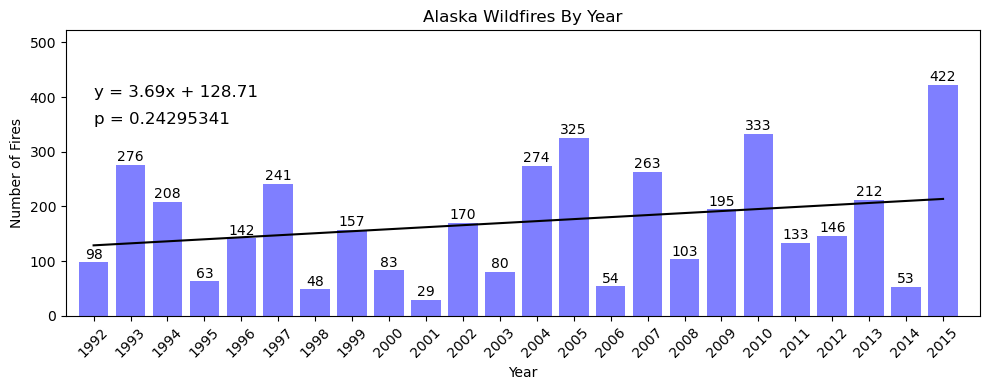

In [18]:
#calculate the linear regression for yearly fires
(slope, intercept, rvalue, pvalue, stderr) = linregress(year_x_axis, yearly_fire_count)
regress_values = year_x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
p_value = "p = " + str(round(pvalue,8))

#plot the data on a bar chart
plt.figure(figsize=(10,4))
plt.bar(year_x_axis, yearly_fire_count, color='b', alpha=0.5, align='center')
plt.xticks(tick_locs, years, rotation=45)
plt.xlim(-0.75, len(year_x_axis))
plt.ylim(0, max(yearly_fire_count)+100)
plt.title("Alaska Wildfires By Year")
plt.xlabel("Year")
plt.ylabel("Number of Fires")
for i, value in enumerate(yearly_fire_count):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.annotate(line_eq,(0,400),fontsize=12,color="black")
plt.annotate(p_value,(0,350),fontsize=12,color="black")
plt.plot(year_x_axis, regress_values, "black")
plt.tight_layout()
plt.savefig("IMAGES/AK/Alaska_Fire_by_Year.png")
plt.show()

In [19]:
#establish a dataframe for calculating the dates and months
Date_df = county_df[["Fire_Date", "FIPS_NAME"]]

#convert dataframe to datetime
Date_df['Fire_Date'] = pd.to_datetime(Date_df['Fire_Date'], format='%m-%d-%Y')
Date_df["Month"] = Date_df["Fire_Date"].dt.month

#convert month column from numerical values to the name of each month
Date_df["Month"] = Date_df["Month"].apply(lambda x: calendar.month_name[x])
Date_df.head()

C:\Users\Tiffa\AppData\Local\Temp\ipykernel_7696\1331560021.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Date_df['Fire_Date'] = pd.to_datetime(Date_df['Fire_Date'], format='%m-%d-%Y')
C:\Users\Tiffa\AppData\Local\Temp\ipykernel_7696\1331560021.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Date_df["Month"] = Date_df["Fire_Date"].dt.month
C:\Users\Tiffa\AppData\Local\Temp\ipykernel_7696\1331560021.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

,Fire_Date,FIPS_NAME,Month
14317,2007-08-10,Wrangell-Petersburg,August
20403,2009-07-07,Wrangell-Petersburg,July
21736,2009-09-19,Kenai Peninsula,September
41106,1993-06-16,No Name Given,June
41107,1993-07-12,No Name Given,July


In [20]:
#create a use a categorical arrangement to organizee the dataframe chronoligcally by month
months_categories = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
Date_df["Month"] = pd.Categorical(Date_df["Month"], categories = months_categories)
Date_df.sort_values(by = "Month")

C:\Users\Tiffa\AppData\Local\Temp\ipykernel_7696\1425822551.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Date_df["Month"] = pd.Categorical(Date_df["Month"], categories = months_categories)


,Fire_Date,FIPS_NAME,Month
128874,2003-01-03,No Name Given,January
254027,2013-03-14,No Name Given,March
212232,2010-04-21,No Name Given,April
206722,2010-04-30,No Name Given,April
263665,2014-04-10,No Name Given,April
...,...,...,...
129126,2004-09-02,No Name Given,September
160937,2006-09-03,No Name Given,September
160862,2004-09-03,No Name Given,September
129128,2004-09-07,No Name Given,September


In [21]:
#determine the number of fires per month
monthly_fire_count = Date_df["Month"].value_counts()
monthly_fire_count = monthly_fire_count.sort_index()
months = monthly_fire_count.index.sort_values()

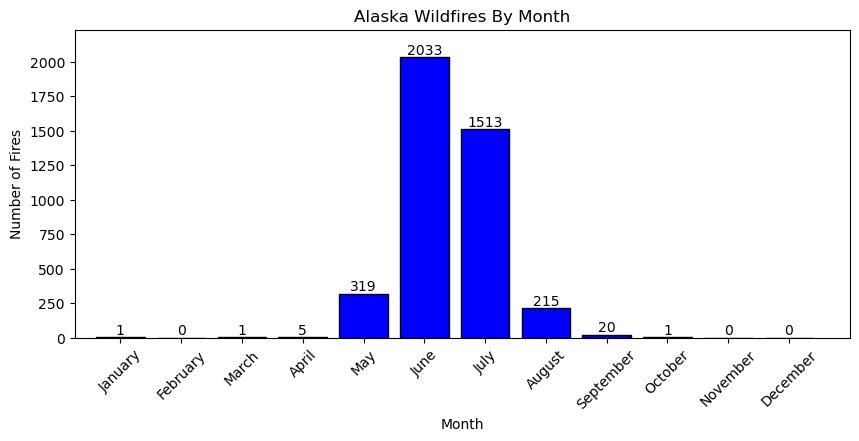

In [22]:
#set up x_axis and tick locations for graphing 
monthly_x_axis = np.arange(len(months.unique()))
month_tick_locations = [value for value in monthly_x_axis]

#graph the number of fires by month to determine if there is a season more prone to fires
plt.figure(figsize=(10,4))
plt.bar(monthly_x_axis, monthly_fire_count, color='blue', edgecolor='black')
plt.xticks(month_tick_locations, months, rotation=45)
plt.xlim(-0.75, len(monthly_x_axis))
plt.ylim(0, max(monthly_fire_count)+200)
plt.title("Alaska Wildfires By Month")
plt.xlabel("Month")
plt.ylabel("Number of Fires")
for i, value in enumerate(monthly_fire_count):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.savefig("IMAGES/AK/Alaska_fire_by_Month.png")
plt.show()

In [23]:
#create a new data table for determining trends between the time it takes to extinguish a fire 
#and the year the fire occurred. 
extinguished_df = Alaska_df[["Days_to_extinguish_fire", "FIRE_YEAR", "Fire_Date"]]

#calculate the average time to extinguish fires per year
avg_extinguished_df = extinguished_df.groupby("FIRE_YEAR")["Days_to_extinguish_fire"].mean()
avg_extinguished_df.head()

FIRE_YEAR
1992    12.197802
1993    13.618182
1994    13.024390
1995    11.730159
1996    19.854369
Name: Days_to_extinguish_fire, dtype: float64

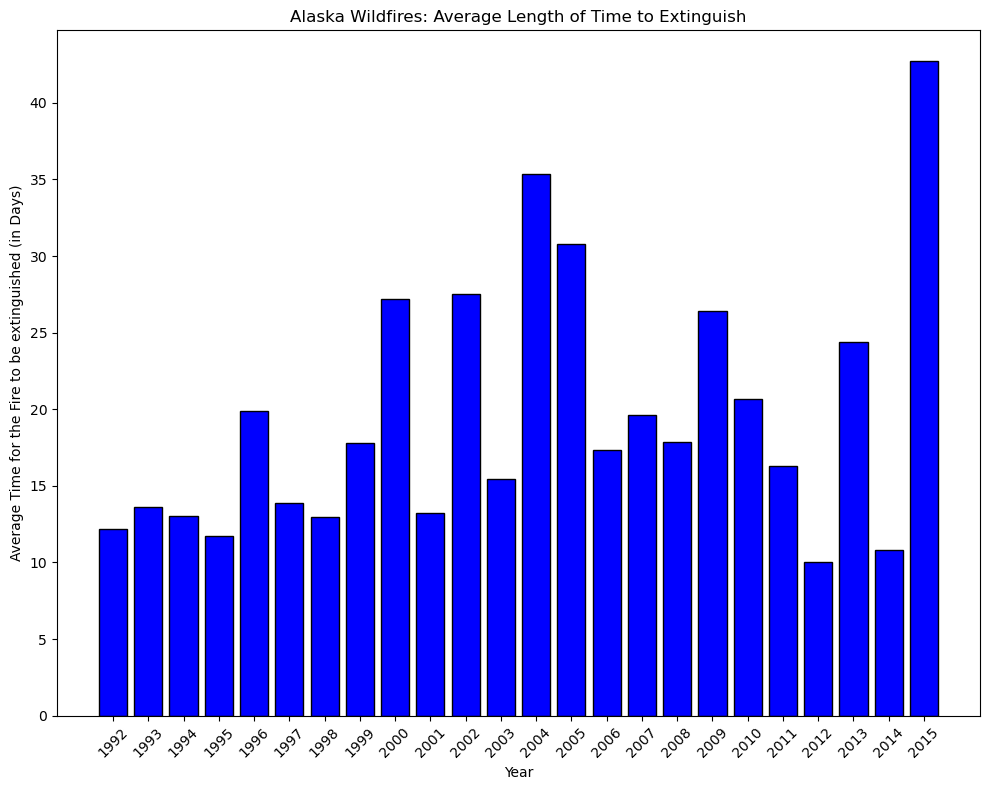

In [24]:
#set up x_axis, y_axis and tick locations for graphing
exting_x_axis = avg_extinguished_df.index 
exting_y_axis = avg_extinguished_df.values 
exting_tick_locations = [value for value in exting_x_axis]

#graph the number of fires by month to determine if there is a season more prone to fires
plt.figure(figsize=(10,8))
plt.bar(exting_x_axis, exting_y_axis, color="blue", edgecolor="black")
plt.ylim(0, max(exting_y_axis)+2)
plt.xticks(exting_tick_locations, rotation = 45)
plt.title("Alaska Wildfires: Average Length of Time to Extinguish")
plt.xlabel("Year")
plt.ylabel("Average Time for the Fire to be extinguished (in Days)")
plt.tight_layout()
plt.savefig("IMAGES/AK/Alaska_extinguish_time.png")
plt.show()

In [35]:
#create a database to compare fire size as it changes over the years. 
fire_size_df = Alaska_df[["FIRE_YEAR", "FIRE_SIZE"]]

#create bins and labels
bins = [0, 1, 100, 1000, 10000, 50000, 65000]
labels = ["<1 Acre", "<100 Acres", "<1000 Acres", "<10000 Acres", "<50000 Acres", "50000+ Acres"]

#bin the data and label each fire accordingly in a new column
fire_size_df["Fire Size Summary"] = pd.cut(fire_size_df["FIRE_SIZE"], 
                                              bins, labels=labels, 
                                              include_lowest=True)

#display the data
fire_size_df


C:\Users\Tiffa\AppData\Local\Temp\ipykernel_7696\3095500210.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire_size_df["Fire Size Summary"] = pd.cut(fire_size_df["FIRE_SIZE"],


,FIRE_YEAR,FIRE_SIZE,Fire Size Summary
14317,2007,0.1,<1 Acre
20403,2009,0.1,<1 Acre
21736,2009,10.0,<100 Acres
41106,1993,0.1,<1 Acre
41107,1993,0.1,<1 Acre
41108,1993,1.0,<1 Acre
41109,1993,0.1,<1 Acre
41110,1993,1.0,<1 Acre
44998,1995,0.1,<1 Acre
44999,1995,0.1,<1 Acre


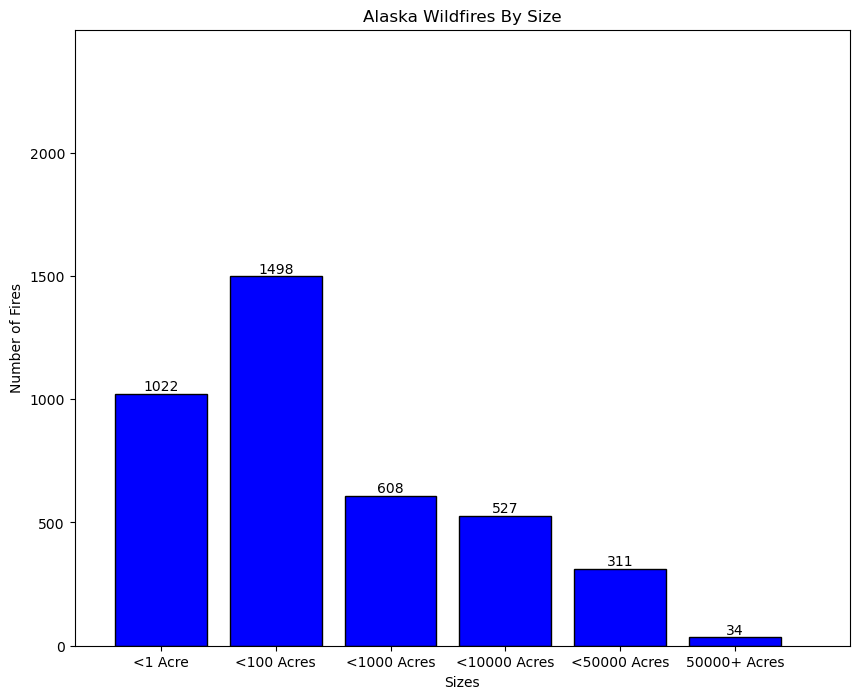

In [26]:
#count the number of each fire size
size_count = fire_size_df["Fire Size Summary"].value_counts()
size_count = size_count.sort_index()
sizes = size_count.index.sort_values()

#create x-axis and tick locations
size_x_axis = np.arange(len(sizes.unique()))
size_tick_locations = [value for value in size_x_axis]

#graph the data in a bar chart
plt.figure(figsize=(10,8))
plt.bar(size_x_axis, size_count, color='blue', edgecolor='black')
plt.xticks(size_tick_locations, sizes)
plt.xlim(-0.75, len(size_x_axis))
plt.ylim(0, max(size_count)+1000)
plt.title("Alaska Wildfires By Size")
plt.xlabel("Sizes")
plt.ylabel("Number of Fires")
for i, value in enumerate(size_count):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.savefig("IMAGES/AK/Alaska_fire_by_Size.png")
plt.show()

In [27]:
#isolate out the data by the smallest fires, in preparation for graphing
smallest = fire_size_df.loc[fire_size_df["Fire Size Summary"] == "<1 Acre",:]
smallest_fires = smallest["FIRE_YEAR"].value_counts()
sm_years = smallest_fires.index.sort_values()
smallest_x_axis = np.arange(len(sm_years.unique()))
tick_locations = [value for value in smallest_x_axis]

#determine the linear regression and p value
(slope, intercept, rvalue, pvalue, stderr) = linregress(smallest_x_axis, smallest_fires)
regress_values = smallest_x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
p_value = "p = " + str(pvalue)


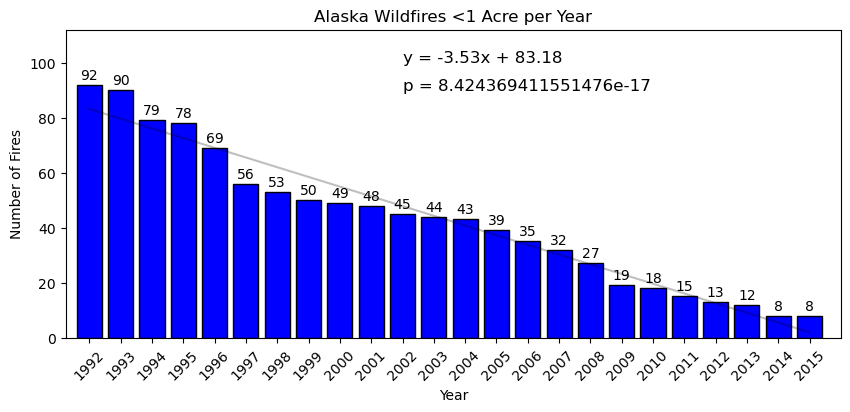

In [28]:
#graph the data for the smallest fires over the years
plt.figure(figsize=(10,4))
plt.bar(smallest_x_axis, smallest_fires, color='blue', edgecolor='black')
plt.xticks(tick_locations, sm_years, rotation=45)
plt.plot(smallest_x_axis, regress_values, color = "black", alpha=0.25)
plt.text(10, 100, line_eq, fontsize=12, color='black')
plt.text(10, 90, p_value, fontsize=12, color='black')
plt.xlim(-0.75, len(smallest_x_axis))
plt.ylim(0, max(smallest_fires)+20)
plt.title("Alaska Wildfires <1 Acre per Year")
plt.xlabel("Year")
plt.ylabel("Number of Fires")
for i, value in enumerate(smallest_fires):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.savefig("IMAGES/AK/Alaska_less_than_one.png")
plt.show()

In [29]:
#isolate out the data fires that do not exceed 100 acres, in preparation for graphing
sec_small = fire_size_df.loc[fire_size_df["Fire Size Summary"] == "<100 Acres",:]
sec_small_fires = sec_small["FIRE_YEAR"].value_counts()
scsm_years = sec_small_fires.index.sort_values()
sec_small_x_axis = np.arange(len(scsm_years.unique()))
tick_locations = [value for value in sec_small_x_axis]

#determine the linear regression and p value
(slope, intercept, rvalue, pvalue, stderr) = linregress(sec_small_x_axis, sec_small_fires)
regress_values = sec_small_x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
p_value = "p = " + str(pvalue)

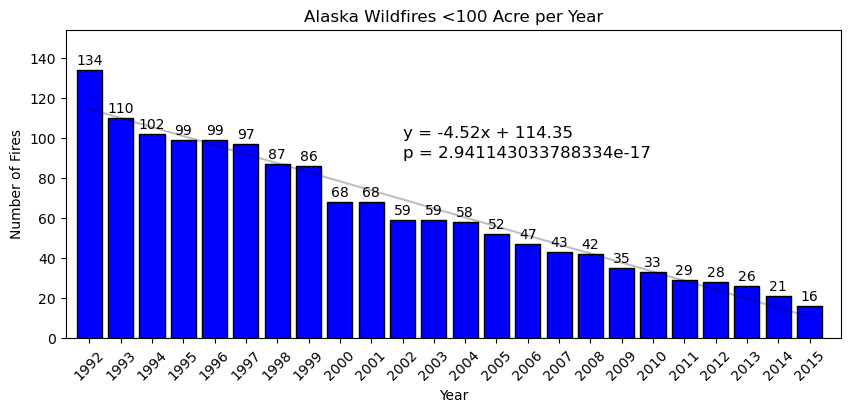

In [30]:
#graph the data for the fires that do not exceed 100 acres over the years
plt.figure(figsize=(10,4))
plt.bar(sec_small_x_axis, sec_small_fires, color='blue', edgecolor='black')
plt.xticks(tick_locations, scsm_years, rotation=45)
plt.plot(sec_small_x_axis, regress_values, color = "black", alpha=0.25)
plt.text(10, 100, line_eq, fontsize=12, color='black')
plt.text(10, 90, p_value, fontsize=12, color='black')
plt.xlim(-0.75, len(sec_small_x_axis))
plt.ylim(0, max(sec_small_fires)+20)
plt.title("Alaska Wildfires <100 Acre per Year")
plt.xlabel("Year")
plt.ylabel("Number of Fires")
for i, value in enumerate(sec_small_fires):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.savefig("IMAGES/AK/Alaska_less_than_hundred.png")
plt.show()

In [31]:
#isolate out the data by the number of fires that do not exceed 1,000 acres, in preparation for graphing
thousand = fire_size_df.loc[fire_size_df["Fire Size Summary"] == "<1000 Acres",:]
thousand_fires = thousand["FIRE_YEAR"].value_counts()
th_years = thousand_fires.index.sort_values()
thousand_x_axis = np.arange(len(th_years.unique()))
tick_locations = [value for value in thousand_x_axis]

#determine the linear regression and p value
(slope, intercept, rvalue, pvalue, stderr) = linregress(thousand_x_axis, thousand_fires)
regress_values = thousand_x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
p_value = "p = " + str(pvalue)


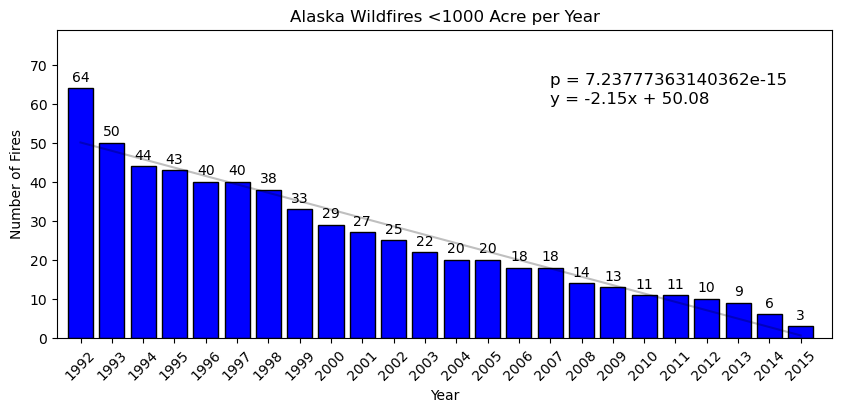

In [32]:
#graph the data for the fires that do not exceed 1,000 acres over the years
plt.figure(figsize=(10,4))
plt.bar(thousand_x_axis, thousand_fires, color='blue', edgecolor='black')
plt.xticks(tick_locations, th_years, rotation=45)
plt.plot(thousand_x_axis, regress_values, color = "black", alpha=0.25)
plt.text(15, 60, line_eq, fontsize=12, color='black')
plt.text(15, 65, p_value, fontsize=12, color='black')
plt.xlim(-0.75, len(thousand_x_axis))
plt.ylim(0, max(thousand_fires)+15)
plt.title("Alaska Wildfires <1000 Acre per Year")
plt.xlabel("Year")
plt.ylabel("Number of Fires")
for i, value in enumerate(thousand_fires):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.savefig("IMAGES/AK/Alaska_less_than_thousand.png")
plt.show()

In [33]:
#isolate out the data by the number of fires that do not exceed 10,000 acres, in preparation for graphing
tn_thousand = fire_size_df.loc[fire_size_df["Fire Size Summary"] == "<10000 Acres",:]
tn_thousand_fires = tn_thousand["FIRE_YEAR"].value_counts()
tnth_years = tn_thousand_fires.index.sort_values()
tn_thousand_x_axis = np.arange(len(tnth_years.unique()))
tick_locations = [value for value in tn_thousand_x_axis]

#determine the linear regression and p value
(slope, intercept, rvalue, pvalue, stderr) = linregress(tn_thousand_x_axis, tn_thousand_fires)
regress_values = tn_thousand_x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
p_value = "p = " + str(pvalue)


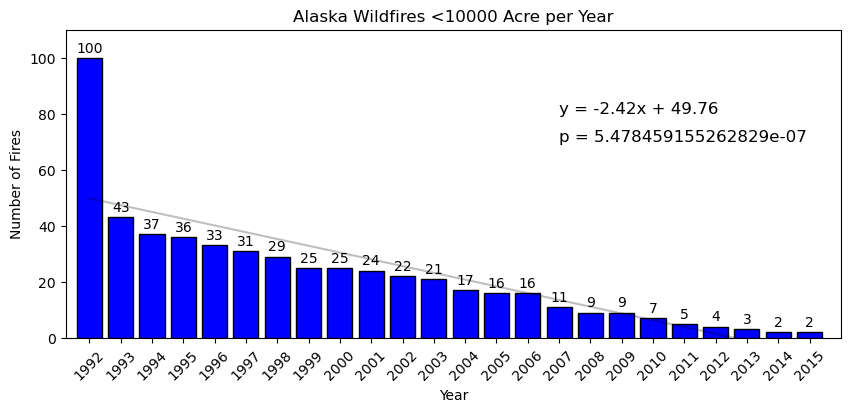

In [34]:
#graph the data for the fires that do not exceed 10,000 acres over the years
plt.figure(figsize=(10,4))
plt.bar(tn_thousand_x_axis, tn_thousand_fires, color='blue', edgecolor='black')
plt.xticks(tick_locations, tnth_years, rotation=45)
plt.plot(tn_thousand_x_axis, regress_values, color = "black", alpha=0.25)
plt.text(15, 80, line_eq, fontsize=12, color='black')
plt.text(15, 70, p_value, fontsize=12, color='black')
plt.xlim(-0.75, len(tn_thousand_x_axis))
plt.ylim(0, max(tn_thousand_fires)+10)
plt.title("Alaska Wildfires <10000 Acre per Year")
plt.xlabel("Year")
plt.ylabel("Number of Fires")
for i, value in enumerate(tn_thousand_fires):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.savefig("IMAGES/AK/Alaska_less_than_ten_thousand.png")
plt.show()

In [26]:
#isolate out the data by the number of fires that do not exceed 50,000 acres, in preparation for graphing
ft_thousand = fire_size_df.loc[fire_size_df["Fire Size Summary"] == "<50000 Acres",:]
ft_thousand_fires = ft_thousand["FIRE_YEAR"].value_counts()
ftth_years = ft_thousand_fires.index.sort_values()
ft_thousand_x_axis = np.arange(len(ftth_years.unique()))
tick_locations = [value for value in ft_thousand_x_axis]

#determine the linear regression and p value
(slope, intercept, rvalue, pvalue, stderr) = linregress(ft_thousand_x_axis, ft_thousand_fires)
regress_values = ft_thousand_x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
p_value = "p = " + str(pvalue)

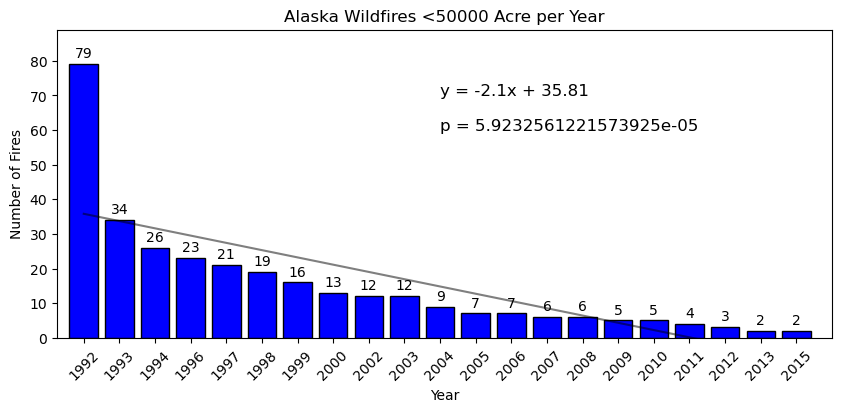

In [27]:
#graph the data for the fires that do not exceed 50,000 acres over the years
plt.figure(figsize=(10,4))
plt.bar(ft_thousand_x_axis, ft_thousand_fires, color='blue', edgecolor='black')
plt.xticks(tick_locations, ftth_years, rotation=45)
plt.plot(ft_thousand_x_axis, regress_values, color = "black", alpha=0.50)
plt.text(10, 70, line_eq, fontsize=12, color='black')
plt.text(10, 60, p_value, fontsize=12, color='black')
plt.xlim(-0.75, len(ft_thousand_x_axis))
plt.ylim(0, max(ft_thousand_fires)+10)
plt.title("Alaska Wildfires <50000 Acre per Year")
plt.xlabel("Year")
plt.ylabel("Number of Fires")
for i, value in enumerate(ft_thousand_fires):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.savefig("IMAGES/AK/Alaska_less_than_fifty_thousand.png")
plt.show()

In [28]:
#isolate out the data by the number of fires that exceed 50,000 acres, in preparation for graphing
plus = fire_size_df.loc[fire_size_df["Fire Size Summary"] == "50000+ Acres",:]
plus_fires = plus["FIRE_YEAR"].value_counts()
plus_years = plus_fires.index.sort_values()
plus_x_axis = np.arange(len(plus_years.unique()))
tick_locations = [value for value in plus_x_axis]

#determine the linear regression and p value
(slope, intercept, rvalue, pvalue, stderr) = linregress(plus_x_axis, plus_fires)
regress_values = plus_x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
p_value = "p = " + str(pvalue)

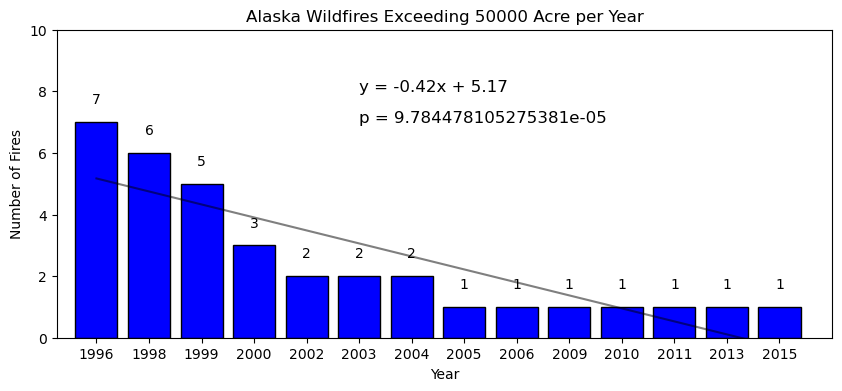

In [29]:
#graph the data for the fires that exceed 50,000 acres over the years
plt.figure(figsize=(10,4))
plt.bar(plus_x_axis, plus_fires, color='blue', edgecolor='black')
plt.xticks(tick_locations, plus_years)
plt.plot(plus_x_axis, regress_values, color = "black", alpha=0.50)
plt.text(5, 8, line_eq, fontsize=12, color='black')
plt.text(5, 7, p_value, fontsize=12, color='black')
plt.xlim(-0.75, len(plus_x_axis))
plt.ylim(0, max(plus_fires)+3)
plt.title("Alaska Wildfires Exceeding 50000 Acre per Year")
plt.xlabel("Year")
plt.ylabel("Number of Fires")
for i, value in enumerate(plus_fires):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom')
plt.savefig("IMAGES/AK/Alaska_greater_than_fifty_thousand.png")
plt.show()

In [30]:
#determine the number of fires per state
fire_count = Alaska_df["FIRE_YEAR"].count()
fire_count

4108

In [31]:
#calculate the number of fires exceeding 50,000 acres
big_fire_count = fire_size_df.loc[fire_size_df["Fire Size Summary"] == "50000+ Acres",:]
big_fire_count["FIRE_YEAR"].count()

34

In [32]:
big_fire_count["FIRE_SIZE"].max()

64416.1